In [1]:
%matplotlib inline
import pylab
import numpy as np
import seaborn
seaborn.set_palette('colorblind')

In [2]:
"""
All data/fits from 
Magid, E., and Turbeck, B. O. (1968). The rates of the spontaneous hydration of CO2 and the reciprocal reaction 
in neutral aqueous solutions between 0 degrees and 38 degrees. Biochim. Biophys. Acta 165, 515–524.
"""
def k_d(T):
    """Effective first order dehydration rate const.
    
    params:
        T: temperature in kelvin.
    
    returns:
        timescale in units of seconds.
    """
    log_kd = 8.60 - 3213.0/T
    return 10**(log_kd)

def k_h(T):
    """Effective first order hydration rate const.
    
    params:
        T: temperature in kelvin.
    
    returns:
        timescale in units of seconds.
    """
    log_kh = 11.63 - 3870.0/T
    return 10**(log_kh)

def t_half(T):
    """Timescale of equilibration as a function of temperature.
    
    params:
        T: temperature in kelvin.
        
    returns:
        timescale in units of seconds.
    """
    kd = k_d(T)
    kh = k_h(T)
    return np.log(2) / (kd+kh)

Tripartite sanity check
1. The cytosolic diffusion coefficient D ~= 1e-5 cm^2/s gives a timescale of 1e-4 s to traverse a 1 um length scale (roughly the size of the cell). So cytosolic diffusion is clearly much faster than the spontaneous reaction.
2. If the carboxysome has the same pH ~= 8 as the cytosol and equilibrates a 30 mM cytosolic Ci pool, it will produce a carboxysomal CO2 concentration of about 500 uM, giving a 500 uM HCO3- concentration gradient across the carboxysome. Assuming a carboxysome permeability in the regime required by the model (~1e-5 cm/s) and a carboxysome surface ~ 2e-10 cm^2 then about 6e5 HCO3- molecules traverse the shell per second, giving a timescale of 1.6e-6 seconds for traversal. If the carboxysome was more acidic, the gradient would be larger and the timescale even faster.
3. There are about 2e3 RuBisCO active sites in the carboxysome and each site has a CO2 kcat of ~10 /s. Assuming they are all CO2 saturated (or nearly so) then the carboxysome can catalyze 2e4 fixations per second, giving a timescale around 5e-5 seconds for fixation. 

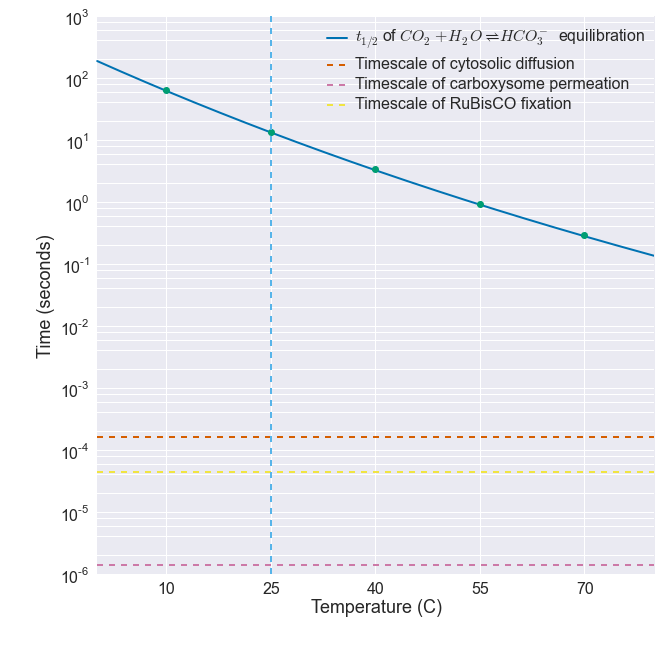

In [3]:
pylab.figure(figsize=(10,10))
temps = np.arange(0, 80, 0.1)
temps_k = temps + 273.15
t_halfs = t_half(temps_k)

label = '$t_{1/2}$ of $CO_2 + H_2O \\rightleftharpoons HCO_3^-$ equilibration'
pylab.semilogy(temps, t_halfs, label=label, lw=2)
pallete = seaborn.color_palette()

# calculate cytosolic diffusional timescale
D_25C = 1e-5 # cm^2/s
cytosolic_diffusion_timescale = (1e-4)**2/(6*D_25C)

# calculate timescale of HCO3- carboxysome permeation
csome_perm_hco3 = 1e-5 # cm/s
total_ci_csome = 30e-3 # M
bicarbonate_to_co2_ratio = 10**(8.0-6.3)
# approximate calculation assuming efficient CCM activity
# that fully equilibrates cytosolic HCO3- pool 
co2_conc_csome = total_ci_csome / (bicarbonate_to_co2_ratio + 1)
# co2 concentration in the carboxysome is equal
# to the HCO3- gradient across the shell. 
csome_sa = 2e-10 # cm^2
avogadros = 6.02e23
bicarbonate_flux = csome_perm_hco3 * co2_conc_csome * csome_sa * avogadros
bicarbonate_csome_entry_timescale = 1.0 / bicarbonate_flux
    
# calculate timescale of RuBisCO fixation assuming CO2 saturation.
rubisco_kcat = 11.0 # /s
n_active_sites = 250 * 8.0
max_rate = n_active_sites * rubisco_kcat
carboxylation_timescale = 1.0 / max_rate
    
temps_15 = np.arange(10, 80, 15)
temps_15_K = temps_15 + 273.15
halftimes_every15 =  t_half(temps_15_K)
pylab.plot(temps_15, halftimes_every15, 'o')
timescales = [('Timescale of cytosolic diffusion', cytosolic_diffusion_timescale),
              ('Timescale of carboxysome permeation', bicarbonate_csome_entry_timescale),
              ('Timescale of RuBisCO fixation', carboxylation_timescale)]

for i, (label, tscale) in enumerate(timescales):
    pylab.plot(temps, np.ones(temps.size)*tscale, ls='--', label=label, lw=2)

pylab.plot([25, 25], [1e-6, 1e3], ls='--', lw=2)
    
pylab.legend()
leg = pylab.gca().get_legend()
ltext  = leg.get_texts()
pylab.setp(ltext, fontsize=16)

pylab.xticks(np.arange(10, 80, 15), fontsize=16)
pylab.yticks(fontsize=16)
pylab.xlabel('Temperature (C)', fontsize=18)
pylab.ylabel('Time (seconds)', fontsize=18)

pylab.savefig('spontaneous_dehydration_timescale.svg')
pylab.savefig('spontaneous_dehydration_timescale.pdf')
pylab.show()

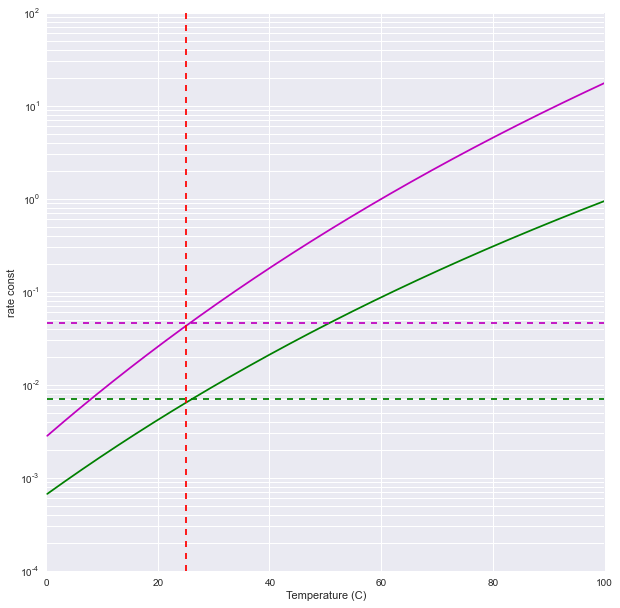

In [4]:
pylab.figure(figsize=(10,10))
temps = np.arange(0, 100, 0.1)
temps_k = temps + 273.15
k_ds = k_d(temps_k)
k_hs = k_h(temps_k)

pylab.semilogy(temps, k_ds, '-g')
pylab.semilogy(temps, k_hs, '-m')
pylab.axhline(7.1e-3, ls='--', color='g')
pylab.axhline(47e-3, ls='--', color='m')
pylab.axvline(25.0, ls='--', color='r')

pylab.xlabel('Temperature (C)')
pylab.ylabel('rate const')
pylab.show()